# Examining reasons for resignation using employee exit survey data from Queensland, Australia

In this project, I will practice cleaning and transforming data in Python. Using employee exit survey data from Australia, I will examine data on resignations to see (a) whether employees with longer vs. shorter tenure resign due to some sort of dissatisfaction and (b) whether younger vs. older employees resign due to some sort of dissatisfaction.

Data for this project comes from exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia ([source](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)).

## Setup

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [430]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [431]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Remove irrelevant columns

Having taken a look at the columns in each dataset, I drop columns that are irrelevant for this project:

In [432]:
# DETE: drop columns 28:49
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], 
                                       axis=1)

# TAFE: drop columns 17:66
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66],
                axis=1)

## Clean up and standardize column names

Next, I clean the column names in each dataframe and ensure that columns that match across the dataframes have the same names:

In [433]:
# DETE: capitalization lowercase, remove whitespace, spaces --> underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [434]:
# TAFE: map new column names onto existing
# so that relevant columns match those in DETE data
mapper = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }

tafe_survey_updated = tafe_survey_updated.rename(mapper=mapper, axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


## Filter data

For this project, I am only going to examine data from individuals who resigned, so I filter the datasets to include only these individuals:

In [435]:
# DETE: show unique values of reasons for exit
print(dete_survey_updated['separationtype'].value_counts())

# filter to include only resignations
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.startswith('Resignation')].copy()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [436]:
# TAFE: show unique values of reasons for exit
print(tafe_survey_updated['separationtype'].value_counts())

# filter to include only resignations
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


## Check data for inaccuracies

Next, I clean the columns in each dataframe that contain the year each employee resigned from their institution:

In [437]:
# DETE: check unique values in cease_date
dete_resignations['cease_date'].value_counts().sort_values(ascending=True)

# extract year from all entries & convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype('float')
print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [438]:
# DETE: check unique values in dete_start_date
# (all year values are floats)
#dete_resignations['dete_start_date'].value_counts().sort_values(ascending=True)

In [439]:
# TAFE: check unique values in cease_date
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

## Compute years of institute service

I will now compute the length of each DETE employee's time at their workplace, calculated as the difference between starting and ending dates. (The TAFE dataset does not contain starting date.)

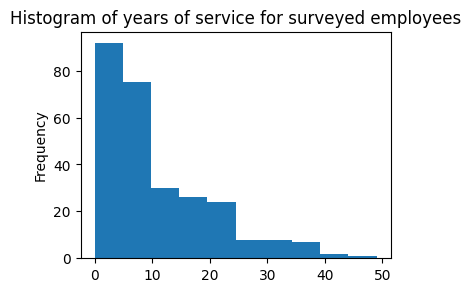

In [440]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].plot(kind='hist', figsize=(4,3),
                                           title = 'Histogram of years of service for surveyed employees')
plt.show()

## Examining dissatisfaction among those who resigned

Next, I'll use a handful of columns in each dataframe to determine whether each employee who resigned was dissatisfied.

In [441]:
# DETE: explore values in columns relating to dissatisfaction
cols = ['job_dissatisfaction',
       'dissatisfaction_with_the_department',
       'physical_work_environment',
       'lack_of_recognition',
       'lack_of_job_security',
       'work_location',
       'employment_conditions',
       'work_life_balance',
       'workload']
print(dete_resignations[cols].head(5))

    job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  work_life_balance  workload  
3           False                  False              False     False  
5           Fa

In [442]:
# create single column `dissatisfied` if any column above is True
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [443]:
# TAFE: explore values in columns relating to dissatisfaction
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [444]:
# update values to be True, False, or NaN
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
    
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [445]:
# create single column `dissatisfied` if either column is True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [446]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the datasets

Now, I combine the DETE and TAFE dataframes:

In [447]:
# add column to DETE and TAFE dataframes to distinguish the two
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [448]:
# combine the dataframes 
print(dete_resignations_up.columns)
print(tafe_resignations_up.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
 

In [449]:
# join the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
# drop columns with <500 non-null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.head(5)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


## Categorize employees according to years of institute service

Next, I'll create a new column, `service_cat`, to group employees by their years of service:

- New: <3 years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran: >10 years

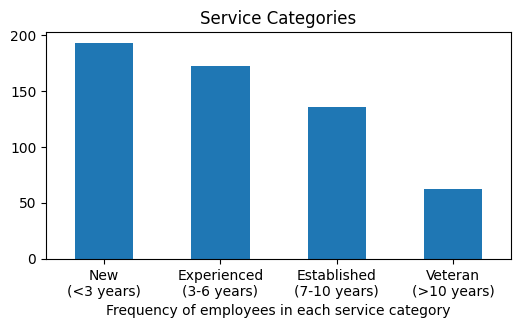

In [451]:
# show values of institute service 
#combined_updated['institute_service'].value_counts()

# clean values of institute_service
combined_data = combined_updated.copy()
combined_data['institute_service'] = combined_data['institute_service'].astype('str').str.split('-').str.get(-1).str.replace('More than 20 years', '20').str.replace('Less than 1 year', '1').astype('float')

# create categories from institute_service column
# New: Less than 3 years at a company
# Experienced: 3-6 years at a company
# Established: 7-10 years at a company
# Veteran: 11 or more years at a company
def map_career_stage(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return 'New'
    elif element >= 3 and element <= 6:
        return 'Experienced'
    elif element >= 7 and element <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_data['service_cat'] = combined_data['institute_service'].apply(map_career_stage)
ax = combined_data['service_cat'].value_counts().plot(kind='bar', figsize=(6,3),
                                                title='Service Categories')
plt.xticks(rotation=0)
ax.set_xticklabels(['New\n(<3 years)',
                    'Experienced\n(3-6 years)',
                    'Established\n(7-10 years)',
                     'Veteran\n(>10 years)'])
plt.xlabel('Frequency of employees in each service category')
plt.show()

## Examining dissatisfaction among those who resigned, by tenure at institution

Finally, I will examine levels of dissatisfaction among those who resigned, according to the categories created above:

In [452]:
# first, replace missing values in `dissatisfied` column with most commonly occurring value (False)
combined_data['dissatisfied'] = combined_data['dissatisfied'].fillna(value=False)
combined_data['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

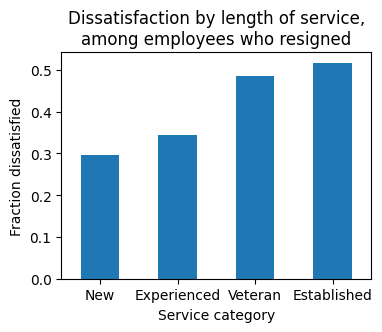

In [453]:
# calculate percentage of dissatisfied employees in each service_cat group, and plot
combined_data.pivot_table(values='dissatisfied', 
                          index='service_cat').sort_values(by='dissatisfied').plot(kind='bar',
                                          figsize=(4,3),
                                          legend=False)
plt.xticks(rotation=0)
plt.xlabel('Service category')
plt.ylabel('Fraction dissatisfied')
plt.title('Dissatisfaction by length of service,\namong employees who resigned')
plt.show()

## Examining dissatisfaction among those who resigned, by age

I'll do something similar as above, examining dissatisfaction levels among those who resigned, according to age. To examine age in chunks, I create several age groupings:

- less than 21 years
- 21-30 years
- 31-40 years
- 41-50 years
- 51-60 years
- greater than 60 years

In [454]:
# examine age values
print(combined_data['age'].head(5))

# clean age values
combined_data['age'] = combined_data['age'].str.replace('  ','-').str.replace('or older', '').str.replace('or younger', '').str.split('-').str.get(0).astype('float')

3     36-40
5     41-45
8     31-35
9     46-50
11    31-35
Name: age, dtype: object


In [455]:
# among retirees, create age categories, young/middle/old
def update_age_group(element):
    if element < 21:
        return '<21'
    elif element >= 21 and element <= 30:
        return '21-30'
    elif element >= 31 and element <= 40:
        return '31-40'
    elif element >= 41 and element <= 50:
        return '41-50'
    elif element >= 51 and element <= 60:
        return '51-60'
    elif element >= 60:
        return '>60'

combined_data['age_group'] = combined_data['age'].apply(update_age_group)

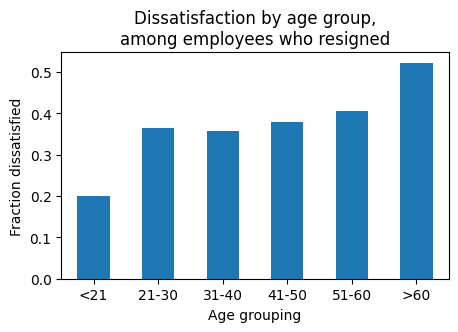

In [456]:
# calculate percentage of dissatisfied employees in each service_cat group, and plot
ptable = combined_data.pivot_table(values='dissatisfied', index='age_group')

#plt.xticks([5,0,1,2,3,4], rotation=0)
ptable = ptable.reindex(index = ['<21', '21-30', '31-40', '41-50', '51-60', '>60'])
ptable.plot(kind='bar', figsize=(5,3), legend=False)
plt.xticks(rotation=0)
plt.xlabel('Age grouping')
plt.ylabel('Fraction dissatisfied')
plt.title('Dissatisfaction by age group,\namong employees who resigned')
plt.show()

## Summary

In this project, I examined exployee exit survey data from two organizations in Queensland, Australia, focusing on those employees who resigned. I found that:


- The majority of surveyed employees had worked at their institution for <7 years.
- The majority of employees who resigned did not express dissatisfaction at work.
- Examining levels of dissatisfaction by the length of time resignees had been at their institution, dissatisfaction was highest among established and veteran employees.
- Examining levels of dissatisfaction by the length of time resignees had been at their institution, dissatisfaction was higher among older employees.